In [3]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn        

# Набор данных для рекомендации купонов в автомобиле

**Цель:** На основе этих данных мы должны предугадать примет ли человек купон в различных сценариях вождения.

**Источник**:http://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

# Признаки:
1. **destination** - ***Пункт назначения*** (No Urgent Place, Home, Work) 
2. **passanger** - ***Пассажиры***: (Alone, Friend(s), Kid(s), Partner) 
3. **weather** - ***Погода*** (Sunny, Rainy, Snowy) 
4. **temperature** - ***Температура*** (55, 80, 30) 
5. **time** - ***Время*** (2PM, 10AM, 6PM, 7AM, 10PM)
6. **coupon** - ***Купон*** (Restaurant(<20dlrs), Coffee House, Carry out & Take away, Bar, Restaurant(20-50dlrs))
7. **expiration** - ***Время действия купона*** (1d, 2h (купон сгорает через 1 день или через 2 часа))
8. **gender** ***Пол*** (Female, Male)
9. **age** - ***Возраст*** (21, 46, 26, 31, 41, 50plus, 36, below21)
10. **maritalStatus** - ***Семейное положение*** (Unmarried partner, Single, Married partner, Divorced, Widowed)
11. **has_Children** - ***Наличие детей*** (1, 0)
12. **education** - ***Образование*** (Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School)
13. **occupation** - ***Профессия*** (Unemployed, Architecture & Engineering, Student
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry)
14. **income** - ***Доход в год*** (37500 - 49999, 62500 - 74999, 12500 - 24999, 75000 - 87499,
50000 - 62499, 25000 - 37499, 100000 or More, 87500 - 99999, Less than 12500)
15. **Bar** - ***Частота посещения бара в месяц*** (never, less1, 1-3, gt8, nan4-8)
16. **CoffeeHouse** - ***Частота посещения кофейни в месяц*** (never, less1, 4-8, 1-3, gt8, nan)
17. **CarryAway** - ***Частота покупки еды на-вынос*** (n4-8, 1-3, gt8, less1, never )
18. **RestaurantLessThan20** - ***Частота посещения ресторана в месяц с средним чеком на 20долларов*** (4-8, 1-3, less1, gt8, never)
19. **Restaurant20To50** - ***Частота посещения ресторана в месяц с средним чеком на 20-50 долларов*** (1-3, less1, never, gt8, 4-8, nan)
20. **toCoupon_GEQ15min** - ***Заведение, в котором можно использовать купон, находится в 15мин езды?*** (0,1)
21. **toCoupon_GEQ25min** - ***Заведение, в котором можно использовать купон, находится в 25мин езды?*** (0, 1)
22. **direction_same** - ***Ресторан или бар находятся по пути*** (0, 1)
23. **direction_opp** - ***Ресторан или бар не находятся по пути*** (0, 1)
24. **Y** - ***Примут ли купон*** (1, 0)



# Считаем данные

In [4]:
url='https://raw.githubusercontent.com/MakBerl/ML_homeworks/main/in-vehicle-coupon-recommendation.csv'
data_raw = pd.read_csv(url, delimiter=',')


pd.set_option('max_columns',None)

# Обработка пропущенных значений
Выведем уникальные значение категориальных столбцов, чтобы, понять есть ли пропущенные значения и сколько их

In [5]:
data_raw.drop('car', axis=1, inplace=True)

In [6]:
data_raw['Bar'].fillna(data_raw['Bar'].mode().iloc[0], inplace=True)
data_raw['CoffeeHouse'].fillna(data_raw['CoffeeHouse'].mode().iloc[0], inplace=True)
data_raw['CarryAway'].fillna(data_raw['CarryAway'].mode().iloc[0], inplace=True)
data_raw['RestaurantLessThan20'].fillna(data_raw['RestaurantLessThan20'].mode().iloc[0], inplace=True)
data_raw['Restaurant20To50'].fillna(data_raw['Restaurant20To50'].mode().iloc[0], inplace=True)

In [7]:
data_raw.loc[data_raw['age'] == 'below21', 'age'] = 16
data_raw.loc[data_raw['age'] == '50plus', 'age'] = 51

In [8]:
data_raw.loc[data_raw.income == 'Less than $12500', 'income'] = 6250
data_raw.loc[data_raw.income == '$12500 - $24999', 'income'] = 18750
data_raw.loc[data_raw.income == '$25000 - $37499', 'income'] = 31250
data_raw.loc[data_raw.income == '$37500 - $49999', 'income'] =  43750
data_raw.loc[data_raw.income == '$50000 - $62499', 'income'] = 56250
data_raw.loc[data_raw.income == '$62500 - $74999', 'income'] = 68750
data_raw.loc[data_raw.income == '$75000 - $87499', 'income'] =  81250
data_raw.loc[data_raw.income == '$87500 - $99999', 'income'] = 93750
data_raw.loc[data_raw.income == '$100000 or More', 'income'] = 106250

In [9]:
data_raw=data_raw.replace(to_replace='gt8', value=10)
data_raw=data_raw.replace(to_replace='4~8', value=6)
data_raw=data_raw.replace(to_replace='1~3',value=2)
data_raw=data_raw.replace(to_replace='less1',value=1)
data_raw=data_raw.replace(to_replace='never',value=0)
#data_raw.head()

In [10]:

data_raw['age']=data_raw['age'].astype('int64')
data_raw['income']=data_raw['income'].astype('int64')
data_raw['Bar']=data_raw['Bar'].astype('int64')
data_raw['CoffeeHouse']=data_raw['CoffeeHouse'].astype('int64')
data_raw['CarryAway']=data_raw['CarryAway'].astype('int64')
data_raw['RestaurantLessThan20']=data_raw['RestaurantLessThan20'].astype('int64')
data_raw['Restaurant20To50']=data_raw['Restaurant20To50'].astype('int64')


In [11]:
data_raw['has_children']=data_raw['has_children']==1
data_raw['toCoupon_GEQ5min']=data_raw['toCoupon_GEQ5min']==1
data_raw['toCoupon_GEQ15min']=data_raw['toCoupon_GEQ15min']==1
data_raw['toCoupon_GEQ25min']=data_raw['toCoupon_GEQ25min']==1
data_raw['direction_same']=data_raw['direction_same']==1
data_raw['direction_opp']=data_raw['direction_opp']==1
data_raw['gender']=data_raw['gender']=='Female'
data_raw['expiration']=data_raw['expiration']=='1d'
data_raw['Y']=data_raw['Y']==1


Пометим столбцы 
**destination, passanger, weather, time, coupon, maritalStatus, education, occupation**\
как ***категориальные***

In [12]:
data_raw['destination'] = data_raw['destination'].astype('category')
data_raw['passanger'] = data_raw['passanger'].astype('category')
data_raw['weather'] = data_raw['weather'].astype('category')
data_raw['time'] = data_raw['time'].astype('category')
data_raw['coupon'] = data_raw['coupon'].astype('category')
data_raw['maritalStatus'] = data_raw['maritalStatus'].astype('category')
data_raw['education'] = data_raw['education'].astype('category')
data_raw['occupation'] = data_raw['occupation'].astype('category')

По корреляции видим, что стобцы **direction_same** и **derection_opp** зависят друг от друга, удалим один из них

In [13]:
data_raw.drop('direction_opp',axis=1,inplace=True)

Так же заметим, что в столбец **toCoupon_GEQ5min** никак не коррелирует ни с одном из признаков и в нем все элементы равны **1**, избавимся от него

In [14]:
data_raw.drop('toCoupon_GEQ5min',axis=1,inplace=True)

# Отбор признаков

In [15]:
data_raw.drop('occupation',axis=1,inplace=True)
data_raw.drop('time',axis=1,inplace=True)
data_raw.drop('education',axis=1,inplace=True)

In [16]:
bool_columns=[c for c in data_raw.columns if data_raw[c].dtype.name == 'bool']
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'category']
#numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name == 'int64']
print(bool_columns)
print(categorical_columns)
print(numerical_columns)

['expiration', 'gender', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y']
['destination', 'passanger', 'weather', 'coupon', 'maritalStatus']
['temperature', 'age', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


# Обработка  признаков для ML

Факторизуем бинарные признаки

In [17]:
for i in bool_columns:
    data_raw[i] = pd.factorize(data_raw[i])[0]
bin_table=data_raw[bool_columns]

Проведем бинаризацию категориальных признаков

In [18]:
categ_table = pd.DataFrame()

#job_dummies = pd.get_dummies(data_raw['job'])
#cat_table=pd.concat((job_dummies, marital_dummies,education_dummies,month_dummies), axis=1)

for i in categorical_columns:
    tmp_table=pd.get_dummies(data_raw[i])
    categ_table=pd.concat((categ_table,tmp_table), axis=1)


Проведем стандартизацию числовых признаков

In [20]:
#num_table_stand=data_raw[numerical_columns]
num_table_stand = (data_raw[numerical_columns]- data_raw[numerical_columns].mean(axis = 0))/data_raw[numerical_columns].std(axis = 0)

Cоединяем все 3 таблицы

In [21]:
#TEST
categ_table = (categ_table- categ_table.mean(axis = 0))/categ_table.std(axis = 0)
bin_table = (bin_table- bin_table.mean(axis = 0))/bin_table.std(axis = 0)
#TEST

data_stand=pd.concat((num_table_stand,bin_table, categ_table),axis=1)
data_stand.head()

,temperature,age,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,Home,No Urgent Place,Work,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20),Divorced,Married partner,Single,Unmarried partner,Widowed
0,-0.433413,-1.055786,-0.290421,-0.66384,-0.846294,-0.731327,0.788929,0.241912,-0.888079,-0.97366,-1.189331,-1.131536,-0.367731,-0.522946,-0.87130,-0.585339,1.009307,-0.576478,0.858072,-0.592745,-0.293493,-0.304291,-0.324727,-0.352928,0.509595,-0.434825,-0.482198,-0.678166,-0.365101,1.884803,-0.20592,-0.820009,-0.77398,2.191347,-0.101757
1,0.871765,-1.055786,-0.290421,-0.66384,-0.846294,-0.731327,0.788929,0.241912,1.125937,-0.97366,-1.189331,-1.131536,-0.367731,-0.522946,1.14762,-0.585339,1.009307,-0.576478,-1.165312,1.686933,-0.293493,-0.304291,-0.324727,-0.352928,0.509595,-0.434825,-0.482198,1.474450,-0.365101,-0.530517,-0.20592,-0.820009,-0.77398,2.191347,-0.101757
2,0.871765,-1.055786,-0.290421,-0.66384,-0.846294,-0.731327,0.788929,0.241912,1.125937,-0.97366,-1.189331,0.883685,-0.367731,-0.522946,-0.87130,-0.585339,1.009307,-0.576478,-1.165312,1.686933,-0.293493,-0.304291,-0.324727,-0.352928,0.509595,-0.434825,2.073673,-0.678166,-0.365101,-0.530517,-0.20592,-0.820009,-0.77398,2.191347,-0.101757
3,0.871765,-1.055786,-0.290421,-0.66384,-0.846294,-0.731327,0.788929,0.241912,1.125937,-0.97366,-1.189331,0.883685,-0.367731,-0.522946,1.14762,-0.585339,1.009307,-0.576478,-1.165312,1.686933,-0.293493,-0.304291,-0.324727,-0.352928,0.509595,-0.434825,-0.482198,1.474450,-0.365101,-0.530517,-0.20592,-0.820009,-0.77398,2.191347,-0.101757
4,0.871765,-1.055786,-0.290421,-0.66384,-0.846294,-0.731327,0.788929,0.241912,-0.888079,-0.97366,-1.189331,0.883685,-0.367731,-0.522946,1.14762,-0.585339,1.009307,-0.576478,-1.165312,1.686933,-0.293493,-0.304291,-0.324727,-0.352928,0.509595,-0.434825,-0.482198,1.474450,-0.365101,-0.530517,-0.20592,-0.820009,-0.77398,2.191347,-0.101757


In [22]:
len(data_stand.columns)

35

# Подготовка тренировочной и тестовой выборки

In [23]:
#new
y = data_raw['Y']

#old
#y = data_stand['Y']
X = data_stand.drop(['Y'], axis=1)
features_names=X.columns

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3528)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

9513 3171


# MLPClassificator

In [188]:
from sklearn.neural_network import MLPClassifier

Попробуем использовать классификатор с различными параметрами:

### lbfgs

In [274]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.00735835172921262
Ошибка на тестовой выборке 0.3465783664459161


In [275]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'lbfgs', 
                          activation = 'identity',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.32818248712288445
Ошибка на тестовой выборке 0.3308104698833175


In [276]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'lbfgs', 
                          activation = 'relu',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.00735835172921262
Ошибка на тестовой выборке 0.32765689057079783


In [277]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.00735835172921262
Ошибка на тестовой выборке 0.3465783664459161


### sgd

In [279]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'sgd', 
                          activation = 'logistic',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.32818248712288445
Ошибка на тестовой выборке 0.336802270577105


In [280]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'sgd', 
                          activation = 'identity',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.3284978450541365
Ошибка на тестовой выборке 0.33522548092084514


In [281]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'sgd', 
                          activation = 'relu',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.015978135183433162
Ошибка на тестовой выборке 0.3286029643645537


In [282]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'sgd', 
                          activation = 'logistic',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.32818248712288445
Ошибка на тестовой выборке 0.336802270577105


### adam

In [323]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.07042993797960684
Ошибка на тестовой выборке 0.3336486912645853


In [285]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'adam', 
                          activation = 'identity',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.3282876064333018
Ошибка на тестовой выборке 0.33333333333333337


In [286]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.009776095868811119
Ошибка на тестовой выборке 0.315357931251971


In [287]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=100000,
                          random_state = 44)
mlp_model.fit(X_train, y_train)
arr_test_e=(1 - mlp_model.score(X_test, y_test))
arr_train_e=(1- mlp_model.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.07042993797960684
Ошибка на тестовой выборке 0.3336486912645853


#### Возьмем в качестве основного решателя **adam**, и функцию активации **relu**

## Тесты с одним нейронным слоем

### Найдем оптимальный параметр регуляризации *alpha* 

In [288]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=100000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

In [300]:
def plot_error_vs(alpha_arr, train_err, test_err, text=''):
    plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
    plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
    plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
    plt.title('Error vs. '+text)
    plt.xlabel(text)
    plt.ylabel('error')
    plt.legend()
def print_min_error(train_err,test_err):
    min_train_err = np.min(train_err)
    min_test_err = np.min(test_err)
    print("minimal error:",min_train_err, min_test_err)

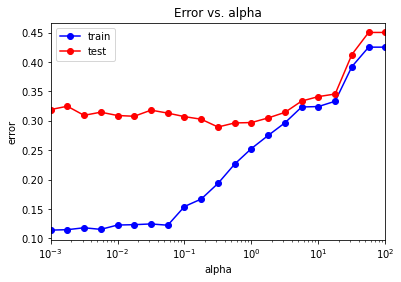

In [301]:
plot_error_vs(alpha_arr,train_err,test_err,'alpha')

Как мы видим при достаточно большом *alpha* происходит переобучение и ошибка возрастает. Найдем минимальную ошибку и оптимальное *alpha* 

In [302]:
print_min_error(train_err,test_err)

minimal error: 0.1141595711132135 0.28949858088930935


In [309]:
alpha_opt = alpha_arr[test_err == np.min(test_err)]
print(alpha_opt)

[0.31622777]


Возьмем этот парметр *alpha* и протестируем классификатор с разным кол-вом нейронов в одном слое

### Тест с разным количеством нейронов в слое

In [305]:
from sklearn.metrics import accuracy_score
neuron_arr = np.logspace(1, 3, 10)
neuron_arr=neuron_arr.astype('int')
test_err1 = []
train_err1 = []
train_acc1 = []
test_acc1 = []

for neuron in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), 
                              solver = 'adam', activation = 'relu', max_iter=100000, random_state = 358)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err1.append(np.mean(y_train != y_train_pred))
    test_err1.append(np.mean(y_test != y_test_pred))
    train_acc1.append(accuracy_score(y_train, y_train_pred))
    test_acc1.append(accuracy_score(y_test, y_test_pred))

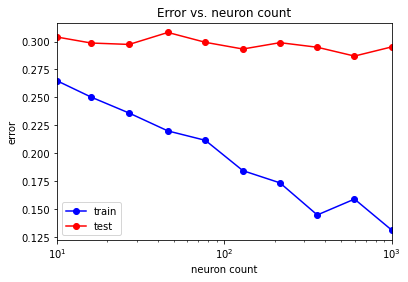

In [307]:
plot_error_vs(neuron_arr, train_err1,test_err1,'neuron count')

Здесь мы можем заметить на данном графике, что изменение количества нейронов в слое на сильно влияет на ошибку предсказания, найдем минимальную ошибку и кол-во нейронов при такой ошибке

In [308]:
print_min_error(train_err1,test_err1)

minimal error: 0.13129401871123725 0.2869757174392936


In [311]:
neuron_opt = neuron_arr[test_err1 == np.min(test_err1)]
print(neuron_opt)

[599]


### Построим классификатор с наилучшим параметром регуляризации и количеством нейронов в слое

In [329]:
from sklearn.neural_network import MLPClassifier
mlp_model_opt = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (int(neuron_opt),),
                          solver = 'adam', activation = 'relu', max_iter=100000, random_state = 538)
print(X_train.shape, y_train.shape)
mlp_model_opt.fit(X_train, y_train)

y_train_pred = mlp_model_opt.predict(X_train)
y_test_pred = mlp_model_opt.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

(9513, 34) (9513,)
0.15032061389677284
0.29202144433932514


Построим матрицу рассогласования

In [331]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[1358  541]
 [ 385  887]]


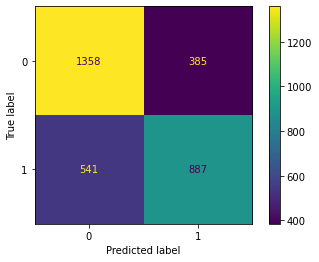

In [332]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model_opt, X_test, y_test,) 

Построим таблицу "точности" предсказания

In [333]:
from sklearn.metrics import roc_curve


from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1743
           1       0.70      0.62      0.66      1428

    accuracy                           0.71      3171
   macro avg       0.71      0.70      0.70      3171
weighted avg       0.71      0.71      0.71      3171



Построим ROC-кривую

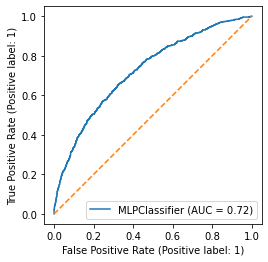

In [334]:
roc=plot_roc_curve(mlp_model, X_test, y_test)
line=plt.plot([0,1],[0,1],'--')
plt.gca().set_aspect('equal')

## Тесты с двумя нейронными слоями

### Найдем оптимальный параметр регуляризации *alpha* 

In [339]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,100), 
                              solver = 'adam', activation = 'relu', max_iter=100000, random_state = 358)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

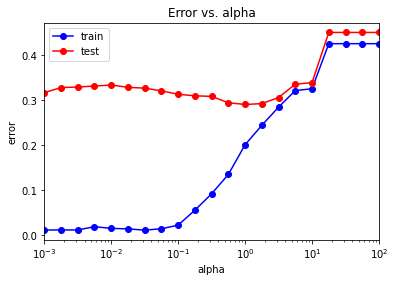

In [340]:
plot_error_vs(alpha_arr,train_err,test_err,'alpha')

Также видим преобучение модели при большом параметре *alpha*, найдем мин ошибку и оптимальное *alpha*

In [341]:
print_min_error(train_err,test_err)

minimal error: 0.01061705035214969 0.2901292967518133


In [342]:
alpha_opt = alpha_arr[test_err == np.min(test_err)]
print(alpha_opt)

[1.]


### Тест с разным количеством нейронов в слоях

In [344]:
from sklearn.metrics import accuracy_score
neuron_arr = np.logspace(1, 3, 10)
neuron_arr=neuron_arr.astype('int')
test_err1 = []
train_err1 = []
train_acc1 = []
test_acc1 = []
for neuron in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron, neuron,), 
                              solver = 'adam', activation = 'relu', max_iter=100000, random_state = 358)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err1.append(np.mean(y_train != y_train_pred))
    test_err1.append(np.mean(y_test != y_test_pred))
    train_acc1.append(accuracy_score(y_train, y_train_pred))
    test_acc1.append(accuracy_score(y_test, y_test_pred))

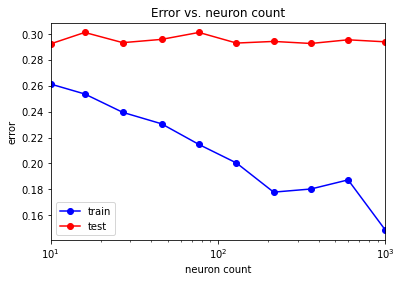

In [345]:
plot_error_vs(neuron_arr, train_err1,test_err1,'neuron count')

Также видим что при увеличении кол-ва нейронов в слоях ошибка особо не меняется, найдем минимальную ошибку и кол-во нейронов, при которых она достигается


In [346]:
print_min_error(train_err1,test_err1)

minimal error: 0.14853358561967833 0.2923368022705771


In [347]:
neuron_opt = neuron_arr[test_err1 == np.min(test_err1)]
print(neuron_opt)

[10]


### Построим классификатор с наилучшим параметром регуляризации и количеством нейронов в слое

In [348]:
from sklearn.neural_network import MLPClassifier
mlp_model_opt = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (int(neuron_opt),),
                          solver = 'adam', activation = 'relu', max_iter=100000, random_state = 538)
print(X_train.shape, y_train.shape)
mlp_model_opt.fit(X_train, y_train)

y_train_pred = mlp_model_opt.predict(X_train)
y_test_pred = mlp_model_opt.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

(9513, 34) (9513,)
0.27877641122674235
0.3090507726269316


Построим матрицу рассогласования

In [349]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[1351  588]
 [ 392  840]]


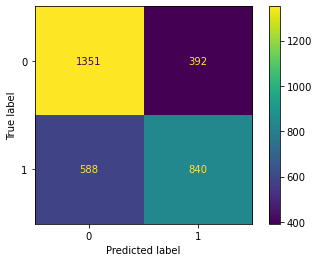

In [350]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model_opt, X_test, y_test,) 

Построим таблицу "точности" предсказания

In [351]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.73      1743
           1       0.68      0.59      0.63      1428

    accuracy                           0.69      3171
   macro avg       0.69      0.68      0.68      3171
weighted avg       0.69      0.69      0.69      3171



Построим ROC-кривую

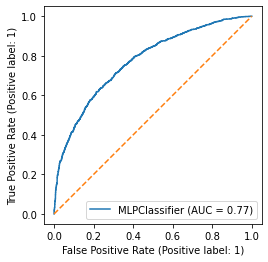

In [352]:
roc=plot_roc_curve(mlp_model, X_test, y_test)
line=plt.plot([0,1],[0,1],'--')
plt.gca().set_aspect('equal')

# Вывод:

Точность предугадывания того, что человек возьмет купон достигает 68-70%, а того, что не примет - 70-72%. Минимальная ошибка, достигнутая на данном классификаторе составляет ~28%. При этом ошибка по сравнению с другими классификаторами особо не уменьшилась, так же особого влияния не оказывает разное количество слоев нейронной сети. Можно сказать, что для этой задачи использование MLP классификатора не особо подходит, скорее всего это связано с тем, что у нас много категориальных признаков.